In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm

%matplotlib notebook

<IPython.core.display.Javascript object>


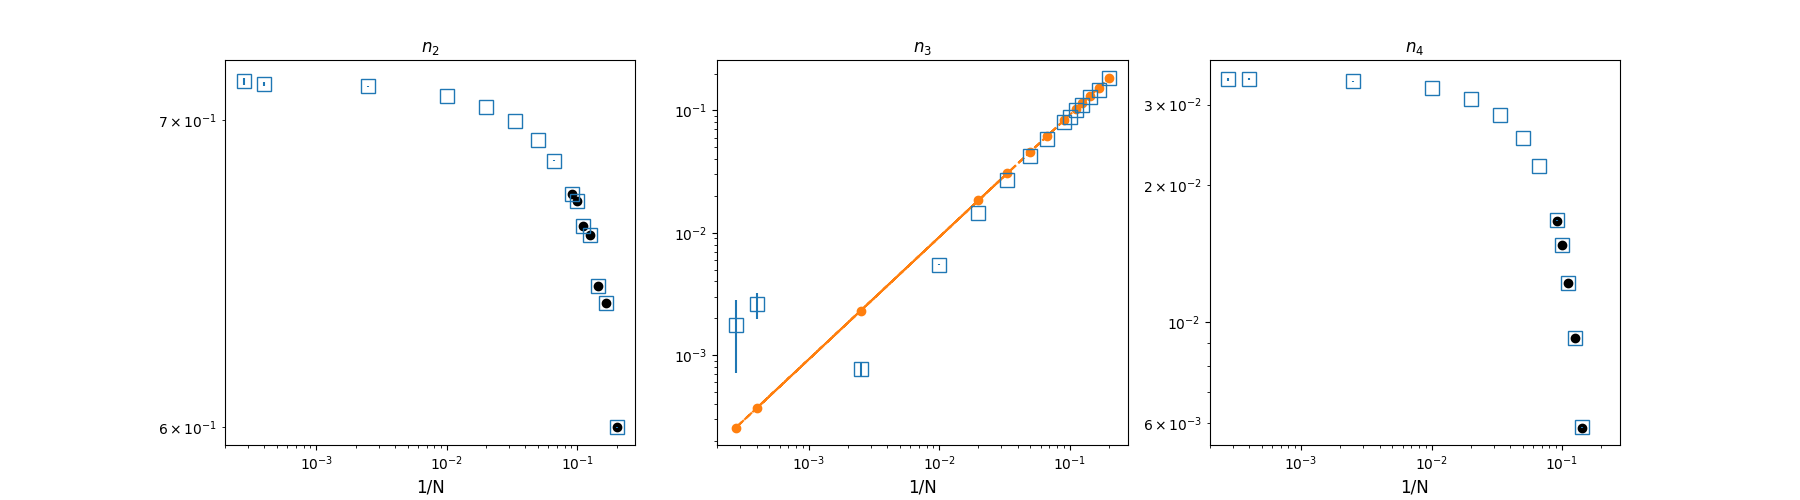

In [2]:
with open('Homopolymer_simulations/Canonical/bulk_EE_from_5_to_11.pickle', 'rb') as f:
    data_EE = pickle.load(f)
 
lengths=np.arange(5,12)
data_np = np.array(data_EE)

fig, axes = plt.subplots(1, 3, figsize=(18,5)) #,  sharey='row')
axes = axes.reshape(-1)

#Exact enumeration data
axes[0].scatter(1/lengths, data_np[:,0], c ="k", label = "j = 0"  )
axes[1].scatter(1/lengths, data_np[:,1]-1/4,c ="k", label = "j = 0"  )
axes[2].scatter(1/lengths, data_np[:,2],c ="k",  label = "j = 0"  )


#MC data
data_np = np.loadtxt("Homopolymer_simulations/Canonical/zero.txt", skiprows=0)


lengths = data_np[:, 0]

axes[0].errorbar(1/lengths, data_np[:,20], yerr=data_np[:,21],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
axes[1].errorbar(1/lengths, np.abs(data_np[:,22]-0.25), yerr=data_np[:,23],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
axes[2].errorbar(1/lengths, data_np[:,24], yerr=data_np[:,25],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
   
axes[0].set_title(r'$n_2$')    
axes[1].set_title(r'$n_3$')    
axes[2].set_title(r'$n_4$') 
 
 
    
    
A = np.vstack([1/lengths[2:], np.ones(len(lengths[2:]))]).T
#print(A.shape)
m1, c1 = np.linalg.lstsq( np.log(A), np.log(np.abs(data_np[2:,22]-0.25 )) , rcond=None)[0]

axes[1].plot(1/lengths[2:],1/lengths[2:]*m1+c1, "o--")

for i in range(3):
    axes[i].set_xlabel("1/N", fontsize=12)
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')

In [3]:
lengths = data_np[:, 0]
lengths

array([ 100.,   10.,   11.,   15.,   20., 2500.,   30., 3600.,  400.,
         50.,    5.,    6.,    7.,    8.,    9.])

In [4]:
df = pd.DataFrame({"L": data_np[:, 0],
                   "n2" : data_np[:, 20],
                   "dn2": data_np[:, 21],
                   "n3" : data_np[:, 22], 
                   "dn3" : data_np[:, 23],
                   "n4" : data_np[:, 24], 
                   "dn4" : data_np[:, 25],

                  })

In [6]:
df = df.sort_values(by="L")
df

,L,n2,dn2,n3,dn3,n4,dn4
10,5.0,0.600000,3.725290e-09,0.064013,0.000014,0.000000,0.000000
11,6.0,0.638487,9.743560e-06,0.103298,0.000017,0.000000,0.000000
12,7.0,0.643961,1.881120e-05,0.120137,0.000023,0.005864,0.000003
13,8.0,0.660655,2.561870e-05,0.139069,0.000026,0.009202,0.000005
14,9.0,0.663796,3.060180e-05,0.149900,0.000031,0.012160,0.000006
1,10.0,0.672215,4.955720e-05,0.161410,0.000051,0.014772,0.000010
2,11.0,0.674498,6.221550e-05,0.168824,0.000060,0.016698,0.000013
3,15.0,0.685898,3.234040e-05,0.191610,0.000027,0.021953,0.000008
4,20.0,0.693051,3.023080e-05,0.207711,0.000028,0.025353,0.000008
6,30.0,0.699565,4.648210e-05,0.223207,0.000040,0.028526,0.000012


In [ ]:
df

<IPython.core.display.Javascript object>


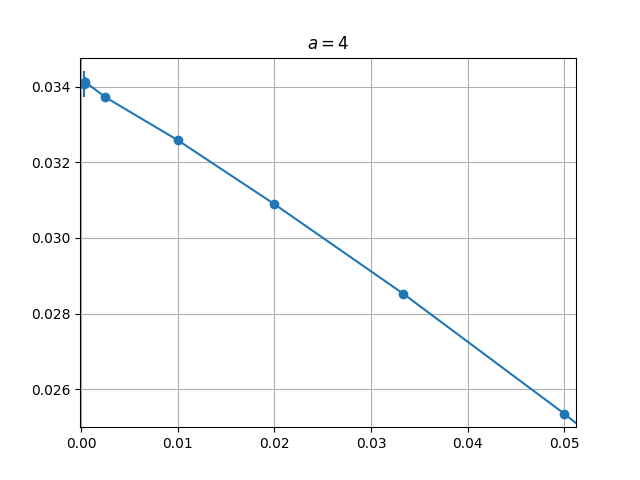

Text(0.5, 1.0, '$a = 4$')

In [7]:
plt.errorbar(1/df["L"], df["n4"], yerr=df["dn4"], fmt='o-')
#plt.yscale('log')
#plt.xscale('log')
plt.grid(True)
plt.title(r'$a = 4$')

<IPython.core.display.Javascript object>


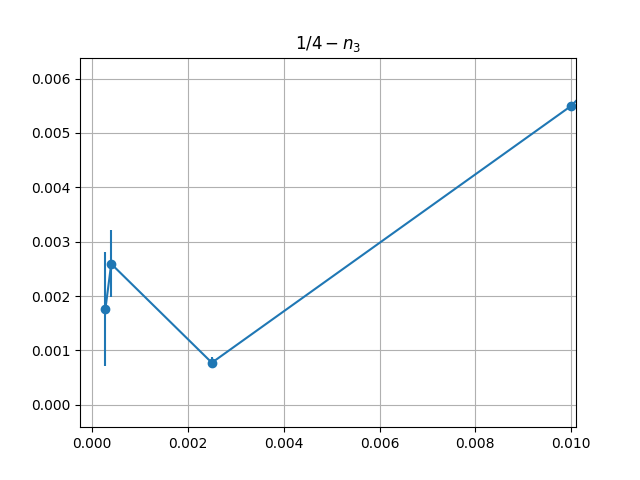

Text(0.5, 1.0, '$1/4 - n_3$')

In [11]:
plt.errorbar(1/df["L"], abs(0.25-df["n3"]), yerr=df["dn3"], fmt='o-')
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$1/4 - n_3$')

<IPython.core.display.Javascript object>


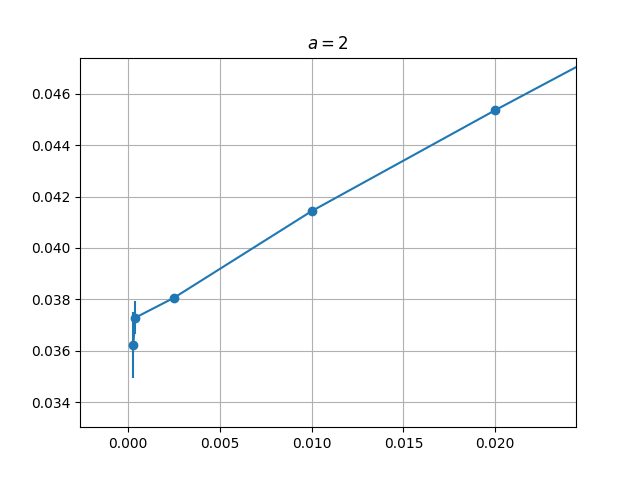

Text(0.5, 1.0, '$a = 2$')

In [10]:
plt.errorbar(1/df["L"], 0.75 - df["n2"], yerr=df["dn2"], fmt='o-')
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$a = 2$')

In [18]:
df["L"]

10       5.0
11       6.0
12       7.0
13       8.0
14       9.0
1       10.0
2       11.0
3       15.0
4       20.0
6       30.0
9       50.0
0      100.0
8      400.0
5     2500.0
7     3600.0
Name: L, dtype: float64

<IPython.core.display.Javascript object>


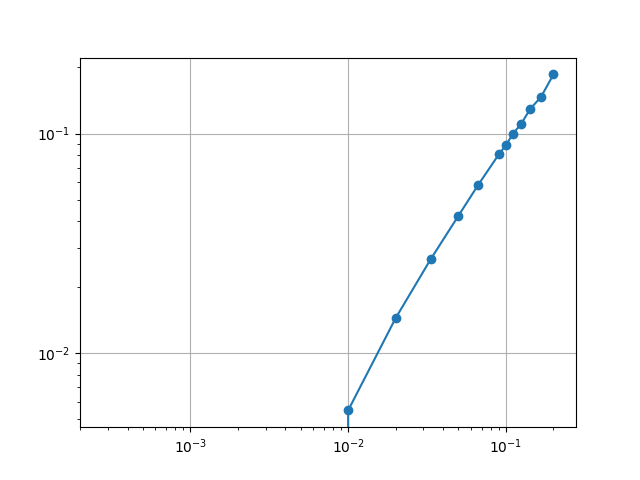

In [7]:
plt.loglog(1/df["L"], 0.25 - df["n3"], 'o-')
plt.grid()